In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [2]:
pd.set_option('display.max_rows', None)

In [3]:
pd.set_option('display.max_colwidth', None)

# Loading Time Series Tables: Stablishments per Neighborhood

In [182]:
estab = pd.read_excel('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\estabelecimentos.xls', None)

In [183]:
estab.keys()

dict_keys(['2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018'])

# Cleaning

In [ ]:
2005: 0,1,3,5 / -1:-10
...
2014: 0,1,3,5 / -1:-9
2015: 0,1,3,5 / -1:-8  
2016: 0,1,3,5 / -1:-7  
...

# Tables 2005 to 2013:

In [206]:
estab_5to14 = []
for i in range(2005, 2014):
    
    df = estab[str(i)].head(-10).tail(-2).dropna(how='any')
    df.columns = df.loc[2].values
    df = df.tail(-1)
    
    estab_5to14.append(df)

In [192]:
len(estab_5to14)

9

# Table 2014:

In [193]:
estab_2014 = estab['2014'].head(-9).tail(-2).dropna(how='any')
estab_2014.columns = estab_2014.loc[2].values
estab_2014 = estab_2014.tail(-1)

# Table 2015:

In [194]:
estab_2015 = estab['2015'].head(-8).tail(-2).dropna(how='any')
estab_2015.columns = estab_2015.loc[2].values
estab_2015 = estab_2015.tail(-1)

# Tables 2016 to 2018:

In [195]:
estab_16on = []
for i in range(2016, 2019):
    
    df = estab[str(i)].head(-7).tail(-2).dropna(how='any')
    df.columns = df.loc[2].values
    df = df.tail(-1)
    
    estab_16on.append(df)

In [210]:
print([len(estab_5to14[i]) for i in range(9)], len(estab_2014), len(estab_2015), [len(estab_16on[j]) for j in range(3)])

[215, 215, 215, 215, 215, 215, 215, 215, 215] 215 215 [215, 215, 215]


# Combining All Tables:


In [227]:
estabs_list = estab_5to14 + [estab_2014] + [estab_2015] + estab_16on

In [228]:
for i in range(2005, 2019):
    
    df = estabs_list[i-2005]
    
    df['Ano'] = [i for j in range(len(df))]
    df_cols = df.columns.values.tolist()
    df = df[[df_cols[-1]] + df_cols[:-1]]
    
    estabs_list[i-2005] = df

In [229]:
estabs = pd.concat(estabs_list, axis=0)

In [231]:
estabs.shape

(3010, 30)

# Testing

In [235]:
col1 = estabs.columns[1]

In [236]:
not_equal=[]
for i in range(len(estabs_list)):
    for j in range(len(estabs_list)):
        
        if i!=j:
            not_equal.append([i+2005, j+2005, estabs_list[i][col1][estabs_list[i][col1]!=estabs_list[j][col1]]])
            
            

In [238]:
not_equal[0]

[2005,
 2006,
 Series([], Name: Áreas de Planejamento, Regiões Administrativas e Bairros, dtype: object)]

# Type Conversion

In [246]:
estabs.replace('-', np.nan, inplace=True)

In [248]:
estabs.iloc[:, 2:] = estabs.iloc[:, 2:].astype(float)

# Saving Complete Time Series of Neighborhood Stablishments:

In [250]:
#estabs.to_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\estabs_clean.csv', index=False)

In [251]:
estabs = pd.read_csv('\\Users\luisr\Desktop\Repository\IBM_courses\Course Work\Assignments\Final Capstone Project\\rio dataframes\\Outside Data\\raw\\bairros\\census\\estabs_clean.csv', index_col=0)

# Exploratory Analysis

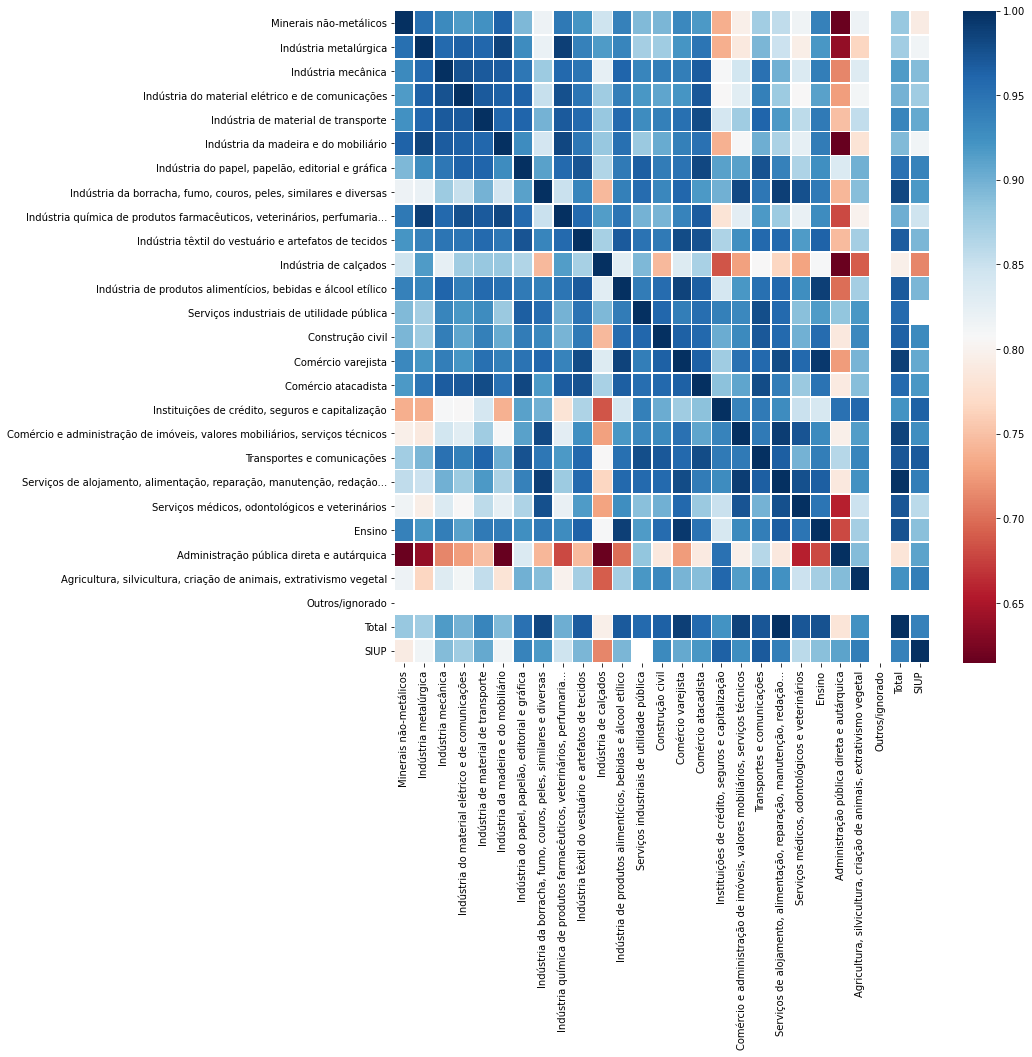

In [254]:
fig = plt.figure(figsize=(12,12))
ax0 = fig.add_subplot(111)

sns.heatmap(estabs.iloc[:, 2:].corr(), cmap='RdBu', linewidths=0.5, ax=ax0)